# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build the OpenWeatherMap API URL
weather_api_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL to get current weather data in Fahrenheit
units = "imperial"
weather_query_url = f"{weather_api_url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold all the city weather data that we want to retrieve
city_names = []
countries = []
temperature_timestamps = []
cloudiness = []
humidity = []
latitudes = []
longitudes = []
max_temperatures = []
wind_speeds = []

# Start of print log as we begin data retrieval using the API
print("Beginning Weather Data Retrieval...")
print(f"-" * 90)

# Perform a weather check on each of the cities using a series of successive API calls
for city_number, city in enumerate(cities, start=1):

    # Call the Weather API for each city in the cities list and save the JSON response data
    city_weather_query = weather_query_url + city
    weather_response = requests.get(city_weather_query).json()

    # Try to grab all of the City weather data if available
    try:
        # Get the City Name
        city_names.append(weather_response['name'])
        # Get the Country Code
        countries.append(weather_response['sys']['country'])
        # Get the Time of data calculation 
        temperature_timestamps.append(weather_response['dt'])
        # Get the % of Cloudiness
        cloudiness.append(weather_response['clouds']['all'])
        # Get the % Of Humidity
        humidity.append(weather_response['main']['humidity'])
        # Get the Latitude and Longitude coordinates
        latitudes.append(weather_response['coord']['lat'])
        longitudes.append(weather_response['coord']['lon'])
        # Get the current temperature
        max_temperatures.append(weather_response['main']['temp_max'])
        # Get the Wind Speed in mph
        wind_speeds.append(weather_response['wind']['speed'])
        
        # Print a log of each city as it's being processed with the city number and city name
        print(f"City {city_number} | Processed data for {city}")

    # Handle exceptions for a city that is not available in the Open Weather API or any other API errors
    except:
        print(f"City {city_number} | Did not find any data for {city}, skipping to the next one...")
        pass

    if city_number == 50:
        break
    # Pause for a half second before making the next API call since the Free version of Weather API only permits 60 calls per minute 
    time.sleep(0.5)

# Print the final log indicating that data retrieval has been completed
print("-" * 90)
print(f"Completed Weather Data Retrieval for {len(city_names)} out of {city_number} Cities")      
print("-" * 90)

Beginning Weather Data Retrieval...
------------------------------------------------------------------------------------------
City 1 | Processed data for torbay
City 2 | Processed data for ushuaia
City 3 | Processed data for mandera
City 4 | Processed data for huari
City 5 | Processed data for acarau
City 6 | Processed data for thompson
City 7 | Did not find any data for grand river south east, skipping to the next one...
City 8 | Did not find any data for gangotri, skipping to the next one...
City 9 | Processed data for mahebourg
City 10 | Processed data for togur
City 11 | Did not find any data for taolanaro, skipping to the next one...
City 12 | Processed data for saskylakh
City 13 | Processed data for rikitea
City 14 | Processed data for itarema
City 15 | Processed data for port elizabeth
City 16 | Processed data for zinder
City 17 | Processed data for avarua
City 18 | Did not find any data for solovetskiy, skipping to the next one...
City 19 | Processed data for busselton
City 20

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Save the retrieved weather data into a Data Frame
weather_data_df = pd.DataFrame( {'City': city_names, 'Country': countries, 'Date': temperature_timestamps, 'Latitude': latitudes, 'Longitude': longitudes, 'Max Temperature': max_temperatures, 'Cloudiness': cloudiness, 'Humidity': humidity, 'Wind Speed': wind_speeds } )

# Display the weather data frame
weather_data_df

# Export the city weather data into a csv file
weather_data_df.to_csv('../output_data/cities.csv', index_label='City #')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

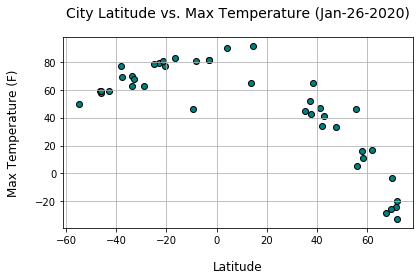

In [5]:
# Draw a scatter plot to showcase the relationship between Temperature (F) vs. Latitude

# Get the current local date so we can print it on the scatter plots
today = date.today()
curr_date = today.strftime('%b-%d-%Y')

# Plot the scatter including the proper axes labels, title and date of analysis
temp_lat_fig, temp_lat_ax = plt.subplots()
temp_lat_ax.scatter(latitudes, max_temperatures, facecolors='teal', edgecolors='black')
temp_lat_ax.set_title(f'City Latitude vs. Max Temperature ({curr_date})', fontsize=14, pad=20)
temp_lat_ax.set_xlabel('Latitude', fontsize=12, labelpad=15)
temp_lat_ax.set_ylabel('Max Temperature (F)', fontsize=12, labelpad=15)
temp_lat_ax.grid(True)
temp_lat_fig.tight_layout()
# Save the plotted figure as a png file
plt.savefig("../images/latitude_maxtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

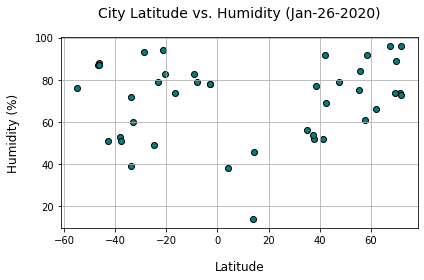

In [6]:
# Draw a scatter plot to showcase the relationship between Humidity (%) vs. Latitude

# Plot the scatter including the proper axes labels, title and date of analysis
hum_lat_fig, hum_lat_ax = plt.subplots()
hum_lat_ax.scatter(latitudes, humidity, facecolors='teal', edgecolors='black')
hum_lat_ax.set_title(f'City Latitude vs. Humidity ({curr_date})', fontsize=14, pad=20)
hum_lat_ax.set_xlabel('Latitude', fontsize=12, labelpad=15)
hum_lat_ax.set_ylabel('Humidity (%)', fontsize=12, labelpad=15)
hum_lat_ax.grid(True)
hum_lat_fig.tight_layout()
# Save the plotted figure as a png file
plt.savefig("../images/latitude_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

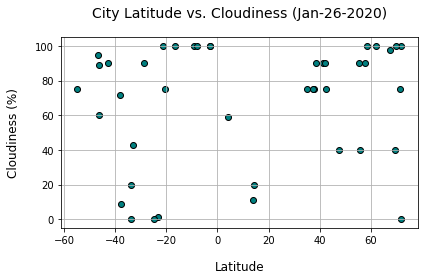

In [7]:
# Draw a scatter plot to showcase the relationship between Cloudiness (%) vs. Latitude

# Plot the scatter including the proper axes labels, title and date of analysis
cloud_lat_fig, cloud_lat_ax = plt.subplots()
cloud_lat_ax.scatter(latitudes, cloudiness, facecolors='teal', edgecolors='black')
cloud_lat_ax.set_title(f'City Latitude vs. Cloudiness ({curr_date})', fontsize=14, pad=20)
cloud_lat_ax.set_xlabel('Latitude', fontsize=12, labelpad=15)
cloud_lat_ax.set_ylabel('Cloudiness (%)', fontsize=12, labelpad=15)
cloud_lat_ax.grid(True)
cloud_lat_fig.tight_layout()
# Save the plotted figure as a png file
plt.savefig("../images/latitude_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

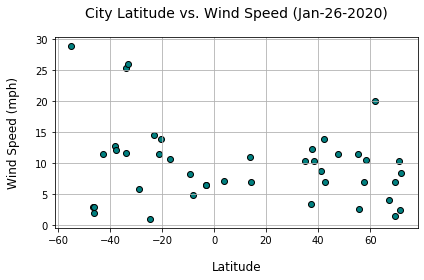

In [8]:
# Draw a scatter plot to showcase the relationship between Wind Speed (mph) vs. Latitude

# Plot the scatter including the proper axes labels, title and date of analysis
windspeed_lat_fig, windspeed_lat_ax = plt.subplots()
windspeed_lat_ax.scatter(latitudes, wind_speeds, facecolors='teal', edgecolors='black')
windspeed_lat_ax.set_title(f'City Latitude vs. Wind Speed ({curr_date})', fontsize=14, pad=20)
windspeed_lat_ax.set_xlabel('Latitude', fontsize=12, labelpad=15)
windspeed_lat_ax.set_ylabel('Wind Speed (mph)', fontsize=12, labelpad=15)
windspeed_lat_ax.grid(True)
windspeed_lat_fig.tight_layout()
# Save the plotted figure as a png file
plt.savefig("../images/latitude_windspeed.png")
plt.show()

## Linear Regression

In [21]:
# Function to create and run Linear Regression plots on different weather data relationships

def create_linregress_plot(x_data, y_data, plot_title, plot_xlabel, plot_ylabel):
    # Calculate the correlation coefficient
    correlation_coefficient = st.pearsonr(x_data, y_data)

    # Store  to respective Series' to compute the linear regression model
    x_series = pd.Series(x_data) 
    y_series = pd.Series(y_data)

    # Calculate the linear regression model
    # The stats.lingress function returns the slope, intercept, r-value, p-value and stderr 
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_series, y_series)
    print (f"The r-squared is: {rvalue}\n")

    # Compute and store the regression values
    regress_values = x_series * slope + intercept

    # Capture the linear regression line equation in the form: y = mx + c
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Draw the properly formatted scatter plot
    scat_fig, scat_ax = plt.subplots()
    scat_ax.scatter(x_series, y_series, facecolors='skyblue', edgecolors='black')
    scat_ax.set_title(plot_title, fontsize=13, pad=20)
    scat_ax.set_xlabel(plot_xlabel, fontsize=12, labelpad=15)
    scat_ax.set_ylabel(plot_ylabel, fontsize=12, labelpad=15)
    scat_ax.plot(x_series, regress_values, 'r-', color='red', alpha=0.7)
    scat_ax.text(50, 90, line_equation, style='italic', bbox={'facecolor': 'green', 'alpha': 0.5})
    scat_ax.grid(True)
    scat_fig.tight_layout()
    return (plt)

In [22]:
# Create Northern and Southern Hemisphere DataFrames

# Northern Hemisphere DataFrame (greater than or equal to 0 degrees latitude)
northern_hemisphere_data = weather_data_df[weather_data_df['Latitude'] >= 0]
# Southern Hemisphere DataFrame (less than 0 degrees latitude)
southern_hemisphere_data = weather_data_df[weather_data_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.93098611904783



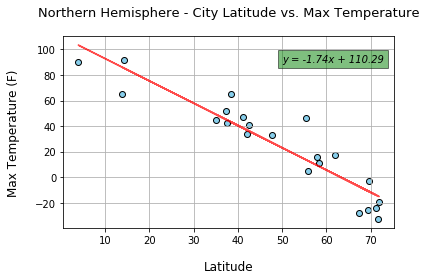

In [23]:
# Retrieve the list of latitudes and max temperatures from the northern hemisphere dataframe
latitudes_list = northern_hemisphere_data['Latitude'].tolist()
max_temps_list = northern_hemisphere_data['Max Temperature'].tolist()

# Set the plot title and axes labels
plot_title = 'Northern Hemisphere - City Latitude vs. Max Temperature'
plot_xlabel = 'Latitude'
plot_ylabel = 'Max Temperature (F)'

# Call function to calculate and create
plt = create_linregress_plot(latitudes_list, max_temps_list, plot_title, plot_xlabel, plot_ylabel)
plt.savefig("../images/nh_latitude_maxtemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression